This is a [jupyter](https://jupyter.org/) notebook that contains text, equations, images and executable code in one document.

# Radition from a cylinder
This notebook shows the sound field radiated by a cylinder.

In [1]:
%matplotlib inline
from ipywidgets import *
from IPython.display import *
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from scipy.special import *
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In order to plot the results in cylindrical coordinates, we have to set a mesh on an annulus (disk with circular hole) that represents the coordinates in the sound field around the cylinder.

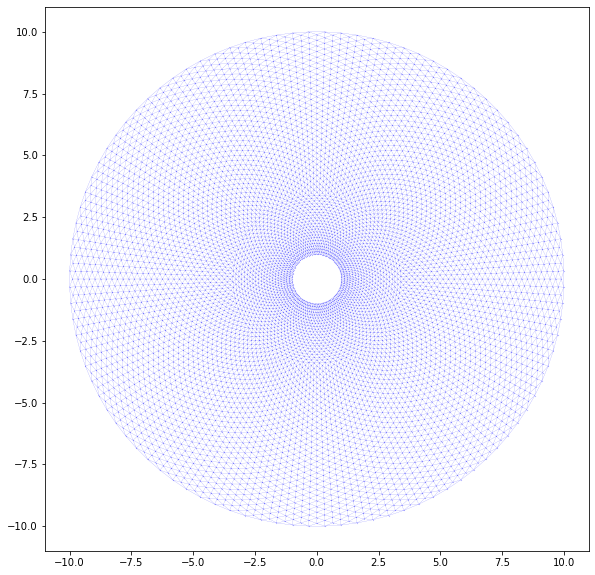

In [2]:
n_angles = 96
n_radii = 80
R = 1 # cylinder radius
radii = np.linspace(R, 10*R, n_radii) # up to 10 times the cylinder radius away
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
triang = tri.Triangulation(x, y) # set up the mesh

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < R*R, 1, 0)
triang.set_mask(mask)

# plot
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.triplot(triang, 'bo-', lw=0.1,ms=0.1);

### Pulsating cylinder
Plots the sound field for pulsating cylinder, e.g. a pressurized hose with pressure fluctuations.

In [3]:
# He = kR, rho0=1, c=1, v0=1, R=1
@interact(He=(0.1,5,0.1),continuous_update=False)
def plt_pulsating_cylinder(He):
    r = np.sqrt(x*x+y*y)
    p00 = 1j/hankel2(1,He)
    p = p00*hankel2(0,He*r)
    plt.gca().set_aspect('equal')
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    plt.tricontourf(triang, p.real, cmap='jet')
    plt.colorbar()
    #plt.tricontour(triang, p.real, colors='k')

interactive(children=(FloatSlider(value=2.5000000000000004, description='He', max=5.0, min=0.1), Output()), _d…

### Vibrating cylinder
Plot the sound field for vibrating cylinder, e.g. a string on a musical instrument or an HVAC installation pipe.

In [4]:
# He = k_r R, rho0=1, c=1, v0=1, R=1
@interact(He=(0.01,1,0.01),continuous_update=False)
def plt_vibrating_cylinder(He):
    r = np.sqrt(x*x+y*y)
    phi = np.arctan2(y,x)
    p01 = -1j/(hankel2(0,He)-hankel2(1,He)/He)
    p = p01*hankel2(1,He*r)*np.cos(phi)
    plt.gca().set_aspect('equal')
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    plt.tricontourf(triang, p.real, cmap='jet')
    plt.colorbar()
    #plt.tricontour(triang, p.real, colors='k')

interactive(children=(FloatSlider(value=0.5, description='He', max=1.0, min=0.01, step=0.01), Output()), _dom_…

Plot the pressure amplitude as a function of helmholtz number.

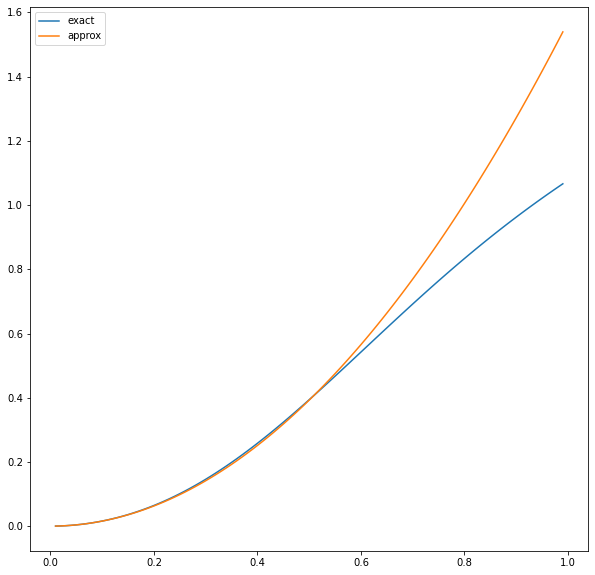

In [5]:
He = np.arange(0.01,1,0.01)
p01 = -1j/(hankel2(0,He)-hankel2(1,He)/He)
p01approx = np.pi*He**2 / 2
plt.plot(He,np.abs(p01))
plt.plot(He,np.abs(p01approx))
plt.legend(['exact','approx']);